In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Supun\Desktop\SUPUN_DATA_PERSONAL\myfiles\MScDA\DS\msc research/dump_ecommerce.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857573 entries, 0 to 857572
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   tracking_number                   857573 non-null  object 
 1   platform_order_number             857573 non-null  int64  
 2   item_cnt                          857573 non-null  int64  
 3   origin_type                       857573 non-null  object 
 4   seller_id                         857573 non-null  int64  
 5   seller_rating                     857573 non-null  float64
 6   seller_address                    857573 non-null  object 
 7   lvl2_origin_address_name          847596 non-null  object 
 8   lvl3_origin_address_name          847596 non-null  object 
 9   lvl4_origin_address_name          847596 non-null  object 
 10  fm_delivery_type                  857565 non-null  object 
 11  fm_3pl_name                       857565 non-null  o

In [4]:
# change date columns from object to date
df[['order_creation_ts','lvl1_rts_ts','lvl1_tts_ts','lvl1_shipped_ts','lvl1_delivered_ts','lvl1_delivery_failed_ts','platform_delivery_promise_min_ts','platform_delivery_promise_max_ts']]=df[['order_creation_ts','lvl1_rts_ts','lvl1_tts_ts','lvl1_shipped_ts','lvl1_delivered_ts','lvl1_delivery_failed_ts','platform_delivery_promise_min_ts','platform_delivery_promise_max_ts']].apply(pd.to_datetime) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857573 entries, 0 to 857572
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   tracking_number                   857573 non-null  object        
 1   platform_order_number             857573 non-null  int64         
 2   item_cnt                          857573 non-null  int64         
 3   origin_type                       857573 non-null  object        
 4   seller_id                         857573 non-null  int64         
 5   seller_rating                     857573 non-null  float64       
 6   seller_address                    857573 non-null  object        
 7   lvl2_origin_address_name          847596 non-null  object        
 8   lvl3_origin_address_name          847596 non-null  object        
 9   lvl4_origin_address_name          847596 non-null  object        
 10  fm_delivery_type                

In [6]:
delivery_analysis = df[['tracking_number','seller_rating','shipping_type','origin_type','package_weight', 'lvl4_origin_address_name','is_bulky', 'payment_type_',
       'fm_delivery_type', 'order_creation_ts','lvl3_destination_address_name','item_cnt','lmsp','lvl3_origin_address_name', 'fmsp',
       'lvl1_rts_ts','lvl1_tts_ts','lvl1_shipped_ts','lvl1_delivered_ts','lvl1_delivery_failed_ts','platform_delivery_promise_min_ts','platform_delivery_promise_max_ts']]

In [7]:
delivered_analysis = delivery_analysis[delivery_analysis['origin_type']=='Domestic']

In [8]:
delivered_analysis = delivered_analysis[delivery_analysis['lvl1_delivered_ts'].notnull()]

In [9]:
distinct_origin_types = delivered_analysis['origin_type'].value_counts()
print(distinct_origin_types)

Domestic    763746
Name: origin_type, dtype: int64


In [10]:
# Calculate the delivery time in hours
delivered_analysis['delivery_time'] = (delivered_analysis['lvl1_delivered_ts'] - delivered_analysis['order_creation_ts']).astype('timedelta64[h]')

In [11]:
# # Convert order_creation_ts and lvl1_delivered_ts columns to numpy datetime64 arrays
order_creation_dates = delivered_analysis['order_creation_ts'].values.astype('datetime64[D]')
lvl1_delivered_dates = delivered_analysis['lvl1_delivered_ts'].values.astype('datetime64[D]')

# Calculate the number of Sundays between order creation and lvl1_delivered dates
sundays = np.busday_count(order_creation_dates, lvl1_delivered_dates, weekmask='1111110')

In [12]:
 # Calculate the delivery time in hours
delivered_analysis['delivery_time'] = (delivered_analysis['lvl1_delivered_ts'] - delivered_analysis['order_creation_ts']).astype('timedelta64[h]')

# # Convert order_creation_ts and lvl1_delivered_ts columns to numpy datetime64 arrays
order_creation_dates = delivered_analysis['order_creation_ts'].values.astype('datetime64[D]')
lvl1_delivered_dates = delivered_analysis['lvl1_delivered_ts'].values.astype('datetime64[D]')

# # Calculate the number of Sundays between order creation and lvl1_delivered dates
sundays = np.busday_count(order_creation_dates, lvl1_delivered_dates, weekmask='1111110')

# # Deduct 24 hours for each Sunday, up to a maximum of the delivery time
deduction = np.minimum(sundays, delivered_analysis['delivery_time'] // 24) * 24
delivered_analysis.loc[sundays > 0, 'delivery_time'] -= deduction[sundays > 0]


In [13]:
distinct_dt = delivered_analysis['delivery_time'].value_counts()
print(distinct_dt)

23.0     42994
22.0     42761
21.0     41652
20.0     40855
19.0     40383
         ...  
129.0        1
107.0        1
100.0        1
91.0         1
114.0        1
Name: delivery_time, Length: 105, dtype: int64


In [14]:
num_rows = len(delivered_analysis)
print(num_rows)

763746


In [15]:
# Calculate the 99th percentile of delivery time
delivery_time_99th = delivered_analysis['delivery_time'].quantile(0.99)

# Filter out rows with delivery times greater than the 99th percentile or negative delivery time
delivered_analysis = delivered_analysis.loc[(delivered_analysis['delivery_time'] >= 4) & 
                                             (delivered_analysis['delivery_time'] <= delivery_time_99th)]


In [16]:
distinct_dt = delivered_analysis['delivery_time'].value_counts()
print(distinct_dt)

23.0    42994
22.0    42761
21.0    41652
20.0    40855
19.0    40383
18.0    39547
17.0    39359
16.0    39224
15.0    37497
14.0    34193
13.0    29035
24.0    24421
25.0    22639
12.0    22401
26.0    20569
27.0    17762
11.0    15467
28.0    14850
29.0    12186
4.0     11882
10.0     9936
30.0     9433
5.0      9369
6.0      7677
31.0     7577
8.0      6879
7.0      6784
9.0      6463
32.0     6460
33.0     5811
34.0     5179
35.0     4232
36.0     3577
37.0     2929
38.0     1976
39.0     1684
40.0     1450
41.0     1262
42.0     1099
43.0      959
44.0      919
45.0      845
46.0      831
Name: delivery_time, dtype: int64


In [17]:
num_rows = len(delivered_analysis)
print(num_rows)

693008


In [18]:
df_zero_delivery_time = delivered_analysis[delivered_analysis['delivery_time'] == 0]

In [19]:
df_zero_delivery_time.head(2500)

,tracking_number,seller_rating,shipping_type,origin_type,package_weight,lvl4_origin_address_name,is_bulky,payment_type_,fm_delivery_type,order_creation_ts,...,lvl3_origin_address_name,fmsp,lvl1_rts_ts,lvl1_tts_ts,lvl1_shipped_ts,lvl1_delivered_ts,lvl1_delivery_failed_ts,platform_delivery_promise_min_ts,platform_delivery_promise_max_ts,delivery_time


In [20]:
delivered_analysis['delivery_time'].describe()

count    693008.000000
mean         19.513756
std           7.158345
min           4.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          46.000000
Name: delivery_time, dtype: float64

In [21]:
# Filter out orders with missing promise dates
valid_orders = delivered_analysis.dropna(subset=['platform_delivery_promise_min_ts', 'platform_delivery_promise_max_ts'])

# Convert platform_delivery_promise_min_ts and platform_delivery_promise_max_ts columns to numpy datetime64 arrays
promise_min_dates = valid_orders['platform_delivery_promise_min_ts'].values.astype('datetime64[D]')
promise_max_dates = valid_orders['platform_delivery_promise_max_ts'].values.astype('datetime64[D]')

# Calculate the number of Sundays between order creation and promise dates
order_creation_dates_valid = valid_orders['order_creation_ts'].values.astype('datetime64[D]')
sundays_min = np.busday_count(order_creation_dates_valid, promise_min_dates, weekmask='1111110')
sundays_max = np.busday_count(order_creation_dates_valid, promise_max_dates, weekmask='1111110')

valid_orders['promise_time_min'] = valid_orders['platform_delivery_promise_min_ts'] - valid_orders['order_creation_ts']
valid_orders['promise_time_min'] = valid_orders['promise_time_min'].dt.total_seconds() / 3600

valid_orders['promise_time_max'] = valid_orders['platform_delivery_promise_max_ts'] - valid_orders['order_creation_ts']
valid_orders['promise_time_max'] = valid_orders['promise_time_max'].dt.total_seconds() / 3600

# Deduct 24 hours for each Sunday, up to a maximum of the promise time
deduction_min = np.minimum(sundays_min, valid_orders['promise_time_min'] // 24) * 24
deduction_max = np.minimum(sundays_max, valid_orders['promise_time_max'] // 24) * 24
valid_orders.loc[sundays_min > 0, 'promise_time_min'] -= deduction_min[sundays_min > 0]
valid_orders.loc[sundays_max > 0, 'promise_time_max'] -= deduction_max[sundays_max > 0]

# Calculate the average promise time in days and round up to the nearest integer
valid_orders['promise_time_avg'] = (valid_orders['promise_time_min'] + valid_orders['promise_time_max']) / 2
valid_orders['promise_time_avg'] = np.ceil(valid_orders['promise_time_avg'])


In [22]:
distinct_pt = valid_orders['promise_time_avg'].value_counts()
print(distinct_pt)

22.0    45061
21.0    43812
23.0    43492
24.0    38552
20.0    37903
19.0    32707
15.0    30474
16.0    30185
17.0    29380
14.0    27908
18.0    27421
13.0    25478
25.0    23675
26.0    21748
27.0    20158
28.0    19070
29.0    18729
30.0    17998
31.0    13119
32.0    11795
12.0    11469
33.0    10659
11.0    10318
10.0    10016
7.0      9735
9.0      9569
8.0      9359
34.0     9319
35.0     9091
36.0     7737
1.0      4943
3.0      4668
4.0      4385
2.0      4069
42.0     3949
5.0      3712
6.0      3494
41.0     2354
37.0     1877
40.0     1386
39.0     1022
38.0      958
43.0       66
44.0       48
45.0       42
47.0       25
46.0       21
54.0       15
48.0       15
49.0        8
53.0        6
51.0        5
60.0        1
52.0        1
59.0        1
Name: promise_time_avg, dtype: int64


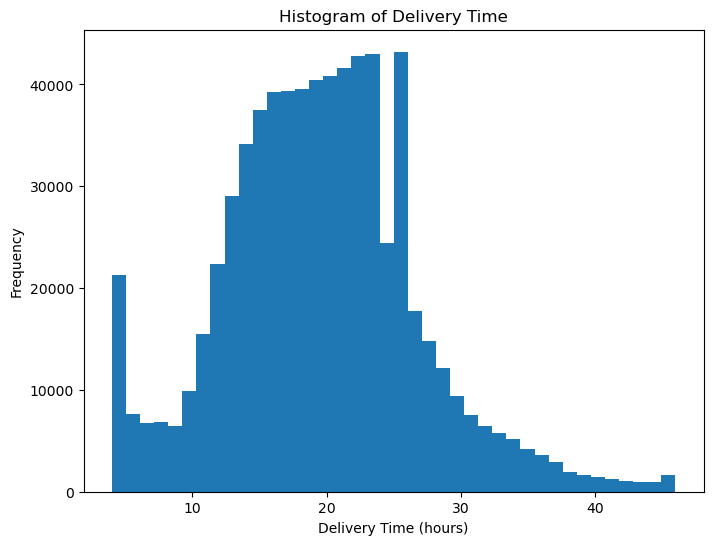

In [23]:
# Plot histogram of delivery time in hours
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
ax.hist(delivered_analysis['delivery_time'], bins=40)

# Add labels and title
ax.set_xlabel('Delivery Time (hours)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Delivery Time')

# Show the plot
plt.show()

In [24]:
 # Calculate the delivery time in days
delivered_analysis['delivery_time_d'] = (delivered_analysis['lvl1_delivered_ts'] - delivered_analysis['order_creation_ts']).astype('timedelta64[D]')

# # Convert order_creation_ts and lvl1_delivered_ts columns to numpy datetime64 arrays
order_creation_dates = delivered_analysis['order_creation_ts'].values.astype('datetime64[D]')
lvl1_delivered_dates = delivered_analysis['lvl1_delivered_ts'].values.astype('datetime64[D]')

# # Calculate the number of Sundays between order creation and lvl1_delivered dates
sundays = np.busday_count(order_creation_dates, lvl1_delivered_dates, weekmask='1111110')

# # Deduct 1 day for each Sunday, up to a maximum of the delivery time
deduction = np.minimum(sundays, delivered_analysis['delivery_time_d']) * 1
delivered_analysis.loc[sundays > 0, 'delivery_time_d'] -= deduction[sundays > 0]

In [25]:
distinct_dtd = delivered_analysis['delivery_time_d'].value_counts()
print(distinct_dtd)

0.0    524358
1.0    168650
Name: delivery_time_d, dtype: int64


In [26]:
num_rows = len(delivered_analysis)
print(num_rows)

693008


In [27]:
# Create a binary variable for delivery promise matching
# delivered_analysis['delivery_promise_matching'] = (delivered_analysis['delivery_time_d'] == delivered_analysis['promise_time_avg']).astype(int)

In [28]:
delivered_analysis.dropna(subset=['lvl1_shipped_ts'], inplace=True)

# Calculate the delivery time in days
delivered_analysis['ship_time_d'] = (delivered_analysis['lvl1_shipped_ts'] - delivered_analysis['order_creation_ts']).astype('timedelta64[D]')

# Convert order_creation_ts and lvl1_shipped_ts columns to numpy datetime64 arrays
order_creation_dates = delivered_analysis['order_creation_ts'].values.astype('datetime64[D]')
lvl1_shipped_dates = delivered_analysis['lvl1_shipped_ts'].values.astype('datetime64[D]')

# Calculate the number of Sundays between order creation and lvl1_shipped dates
sundays = np.busday_count(order_creation_dates, lvl1_shipped_dates, weekmask='1111110')

# Deduct 1 day for each Sunday, up to a maximum of the delivery time
deduction = np.minimum(sundays, delivered_analysis['ship_time_d']) * 1
delivered_analysis.loc[sundays > 0, 'ship_time_d'] -= deduction[sundays > 0]


In [29]:
distinct_std = delivered_analysis['ship_time_d'].value_counts()
print(distinct_std)

0.0    440813
1.0    251476
2.0       709
Name: ship_time_d, dtype: int64


In [30]:
# Create Delivery - hour of the day feature
delivered_analysis['delivery_hour'] = delivered_analysis['lvl1_delivered_ts'].dt.hour

# Create Delivery - day of the week feature
delivered_analysis['delivery_dayofweek'] = delivered_analysis['lvl1_delivered_ts'].dt.dayofweek

# Create Order - hour of the day feature
delivered_analysis['order_hour'] = delivered_analysis['order_creation_ts'].dt.hour

# Create Order - day of the week feature
delivered_analysis['order_dayofweek'] = delivered_analysis['order_creation_ts'].dt.dayofweek


In [31]:
delivered_analysis.head()

,tracking_number,seller_rating,shipping_type,origin_type,package_weight,lvl4_origin_address_name,is_bulky,payment_type_,fm_delivery_type,order_creation_ts,...,lvl1_delivery_failed_ts,platform_delivery_promise_min_ts,platform_delivery_promise_max_ts,delivery_time,delivery_time_d,ship_time_d,delivery_hour,delivery_dayofweek,order_hour,order_dayofweek
1,30310567,90.0,Marketplace,Domestic,1.200,Homagama,0,COD,Drop-off,2022-09-01 11:10:23,...,NaT,2022-09-04 11:10:23,2022-09-06 11:10:23,25.0,1.0,0.0,12,6,11,3
2,30310579,88.0,Marketplace,Domestic,4.000,Colombo 10 - Maradana,0,Prepaid,Pickup,2022-09-01 22:20:37,...,NaT,2022-09-05 06:00:00,2022-09-06 18:00:00,15.0,0.0,0.0,14,0,22,3
4,30310656,86.0,Marketplace,Domestic,1.000,Colombo 11 - Pettah,0,COD,Drop-off,2022-09-01 00:05:12,...,NaT,2022-09-04 06:00:00,2022-09-05 18:00:00,38.0,1.0,0.0,14,1,0,3
5,30310658,94.0,Warehouse,Domestic,1.295,Kelaniya,0,Prepaid,Pickup,2022-09-01 12:55:51,...,NaT,2022-09-03 18:00:00,2022-09-05 18:00:00,23.0,0.0,0.0,12,1,12,3
6,30310662,87.0,Warehouse,Domestic,0.065,Kelaniya,0,COD,Pickup,2022-09-01 14:05:59,...,NaT,2022-09-03 18:00:00,2022-09-05 18:00:00,22.0,0.0,0.0,12,4,14,3


In [32]:
# Create a consolidated feature for shipping and delivery type
conditions = [
    (delivered_analysis['shipping_type'] == 'Marketplace') & (delivered_analysis['fm_delivery_type'] == 'Pickup'),
    (delivered_analysis['shipping_type'] == 'Marketplace') & (delivered_analysis['fm_delivery_type'] == 'Drop-off'),
    (delivered_analysis['shipping_type'] == 'Warehouse') & (delivered_analysis['fm_delivery_type'] == 'Pickup')
]
choices = ['Vendor Pickup', 'Vendor Dropoff', 'Warehouse']
delivered_analysis['fulfillment_type'] = np.select(conditions, choices, default='Other')


In [33]:
ff_type = delivered_analysis['fulfillment_type'].value_counts()
print(ff_type)

Vendor Dropoff    450385
Vendor Pickup     167313
Warehouse          75300
Name: fulfillment_type, dtype: int64


In [34]:
# Create a new feature indicating whether the destination and origin addresses are the same
delivered_analysis['ori_des'] = np.where(delivered_analysis['lvl3_destination_address_name'] == delivered_analysis['lvl3_origin_address_name'], 'same_ori_des', 'different_ori_des')
ori_des = delivered_analysis['ori_des'].value_counts()
print(ori_des)

different_ori_des    604497
same_ori_des          88501
Name: ori_des, dtype: int64


In [35]:
predictor_variables = delivered_analysis[['delivery_time','ori_des','fulfillment_type','delivery_hour','delivery_dayofweek','order_hour','order_dayofweek','seller_rating',
                                         'item_cnt','lvl3_origin_address_name','lmsp','lvl3_destination_address_name','package_weight','payment_type_']]

target_variable = delivered_analysis[['delivery_time']]

In [36]:
#LSTM

In [37]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack, csr_matrix


# Split the data into training and testing sets
X = delivered_analysis[['ori_des', 'fulfillment_type', 'delivery_hour', 'delivery_dayofweek', 'order_hour', 'order_dayofweek', 'seller_rating', 'item_cnt', 'lvl3_origin_address_name', 'lmsp', 'lvl3_destination_address_name', 'package_weight', 'payment_type_']]
y = delivered_analysis['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical columns and one-hot encode them
cat_cols = ['ori_des', 'delivery_hour', 'delivery_dayofweek', 'order_hour', 'order_dayofweek', 'lmsp', 'fulfillment_type', 'lvl3_destination_address_name', 'lvl3_origin_address_name', 'payment_type_']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cat_cols])

X_train_enc = enc.transform(X_train[cat_cols])
X_test_enc = enc.transform(X_test[cat_cols])

X_train = hstack([X_train.drop(cat_cols, axis=1), X_train_enc])
X_test = hstack([X_test.drop(cat_cols, axis=1), X_test_enc])

# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Reshape the data for LSTM
n_steps = 1
n_features = X_train_scaled.shape[1]

if len(X_train_scaled.shape) == 1:
    X_train_scaled = X_train_scaled.toarray()
    X_test_scaled = X_test_scaled.toarray()

X_train_dense = X_train_scaled.todense()
X_test_dense = X_test_scaled.todense()

X_train_reshaped = X_train_dense.reshape((X_train_dense.shape[0], n_steps, n_features))
X_test_reshaped = X_test_dense.reshape((X_test_dense.shape[0], n_steps, n_features))

# Define the quantile levels
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]


In [48]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

X_train_reshaped = X_train.toarray().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.toarray().reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train_reshaped, y_train, epochs=300, batch_size=100, validation_data=(X_test_reshaped, y_test), callbacks=[early_stop])

# Predict the target variable for the test data
y_pred = model.predict(X_test_reshaped)

Epoch 1/300
5544/5544 [==============================] - 25s 4ms/step - loss: 23.0781 - val_loss: 14.8177
Epoch 2/300
5544/5544 [==============================] - 24s 4ms/step - loss: 12.5258 - val_loss: 11.6626
Epoch 3/300
5544/5544 [==============================] - 23s 4ms/step - loss: 10.4427 - val_loss: 10.5256
Epoch 4/300
5544/5544 [==============================] - 22s 4ms/step - loss: 9.3373 - val_loss: 9.4552
Epoch 5/300
5544/5544 [==============================] - 23s 4ms/step - loss: 8.5999 - val_loss: 8.5757
Epoch 6/300
5544/5544 [==============================] - 22s 4ms/step - loss: 8.2358 - val_loss: 8.1358
Epoch 7/300
5544/5544 [==============================] - 23s 4ms/step - loss: 7.9160 - val_loss: 7.9990
Epoch 8/300
5544/5544 [==============================] - 22s 4ms/step - loss: 7.7921 - val_loss: 7.6593
Epoch 9/300
5544/5544 [==============================] - 23s 4ms/step - loss: 7.6871 - val_loss: 7.6095
Epoch 10/300
5544/5544 [==============================] - 

In [49]:
# Compute the pinball loss for each observation
pinball_losses = np.zeros((X_test_scaled.shape[0], len(quantiles)))
for i, q in enumerate(quantiles):
    for j in range(X_test_scaled.shape[0]):
        error = q * (y_test.values[j] - y_pred[j]) if y_test.values[j] >= y_pred[j] else (q - 1) * (y_pred[j] - y_test.values[j])
        pinball_losses[j, i] = error

# Compute the average pinball loss over all observations
avg_pinball_loss = np.mean(np.mean(pinball_losses, axis=1))

# Print the results
for i, q in enumerate(quantiles):
    pinball_loss = np.mean(pinball_losses[:, i])
    print(f"Pinball loss ({q:.2f}): {pinball_loss:.2f}")
    print(f"Average pinball loss: {avg_pinball_loss:.2f}")



Pinball loss (0.05): -0.66
Pinball loss (0.25): -0.44
Pinball loss (0.50): -0.17
Pinball loss (0.75): 0.10
Pinball loss (0.95): 0.32
Average pinball loss: -0.17


In [47]:
# Compute the CRPS for the test data
from scipy.stats import norm
crps = 0
for j in range(X_test_scaled.shape[0]):
    cdf_vals = norm.cdf(y_pred[j] - y_test.values[j], scale=np.std(y_train))
    crps += np.mean((quantiles - cdf_vals) ** 2)
crps /= len(y_test)

# Print the results
print(f"CRPS: {crps:.2f}")


CRPS: 0.12


4332/4332 [==============================] - 9s 2ms/step


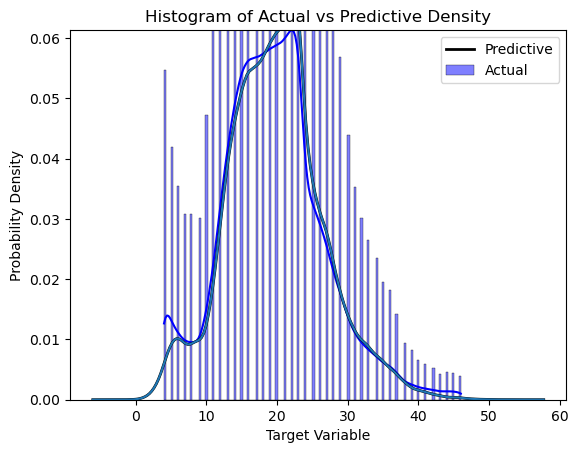

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of actual observations with normalized density
sns.histplot(y_test, color='blue', label='Actual', kde=True, alpha=0.5, stat='density')

# Generate the predictive density from LSTM forecasts
y_pred_density = model.predict(X_test_reshaped)

# Plot the predicted density as a line chart
sns.kdeplot(y_pred_density[:,0], color='black', label='Predictive', linewidth=2)

# Get the maximum density value from the predictive density
max_density = max(sns.kdeplot(y_pred_density[:,0]).get_lines()[0].get_ydata())

# Set the y-axis limit to the maximum density value
plt.ylim(0, max_density)

# Add legend and labels to the plot
plt.legend()
plt.xlabel('Target Variable')
plt.ylabel('Probability Density')
plt.title('Histogram of Actual vs Predictive Density')

# Show the plot
plt.show()

In [56]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the performance on the validation set
y_pred = model.predict(X_test_reshaped)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Performance on Validation Set')
plt.show()

NameError: name 'history' is not defined